# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name:

Student UT EID:

---

Partner Name:

Partner UT EID:

---

Date Created:

Date Last Modified:

---

Totoal Points 20. 



## Supprt Vector Machine 

In [62]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [63]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [64]:
df = heart_df.copy()
df = df[['Target', 'Age', 'Sex', 'Chol']]
df['Target'] = df['Target'].map({'No': 0, 'Yes': 1})
X = df[["Age","Sex","Chol"]]
y=df["Target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
# Add your code Here! 
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [66]:
# Add your code Here! 
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63        31
           1       0.44      0.13      0.21        30

    accuracy                           0.49        61
   macro avg       0.47      0.49      0.42        61
weighted avg       0.47      0.49      0.42        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [67]:
def compute_cost(X, y, W, regularization_factor):
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

In [68]:
def calculate_gradient(X, y, W, regularization_factor):
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
    distance = 1 - (y * np.dot(X, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        #print(X)
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
        dw += di

    dw = dw/len(y)  # average
    return dw

In [69]:
X_train=X_train.values
y_train=y_train.values

In [70]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001
regularization = 0.01
cost_list = []
weights = np.zeros(3)
for i in range(0, num_iterations):
    cost = compute_cost(X_train, y_train, weights, regularization)
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    cost_list.append(cost)
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    weights = weights - learnin_rate * grad

Epoch 0 Cost is: 0.01 weights [0. 0. 0.]
Epoch 1 Cost is: 0.009864157452428754 weights [2.57148760e-05 3.51239669e-07 1.13681818e-04]
Epoch 2 Cost is: 0.009728342072008596 weights [5.14271806e-05 7.02444215e-07 2.27352268e-04]
Epoch 3 Cost is: 0.009592553853306367 weights [7.71369139e-05 1.05361364e-06 3.41011351e-04]
Epoch 4 Cost is: 0.009456792790889998 weights [1.02844076e-04 1.40474795e-06 4.54659068e-04]
Epoch 5 Cost is: 0.009321058879328502 weights [1.28548668e-04 1.75584714e-06 5.68295420e-04]
Epoch 6 Cost is: 0.009185352113191977 weights [1.54250689e-04 2.10691123e-06 6.81920409e-04]
Epoch 7 Cost is: 0.009049672487051614 weights [1.79950140e-04 2.45794021e-06 7.95534035e-04]
Epoch 8 Cost is: 0.008914019995479682 weights [2.05647021e-04 2.80893408e-06 9.09136300e-04]
Epoch 9 Cost is: 0.008778394633049538 weights [2.31341332e-04 3.15989286e-06 1.02272720e-03]
Epoch 10 Cost is: 0.00864279639433563 weights [2.57033074e-04 3.51081654e-06 1.13630675e-03]
Epoch 11 Cost is: 0.008507225

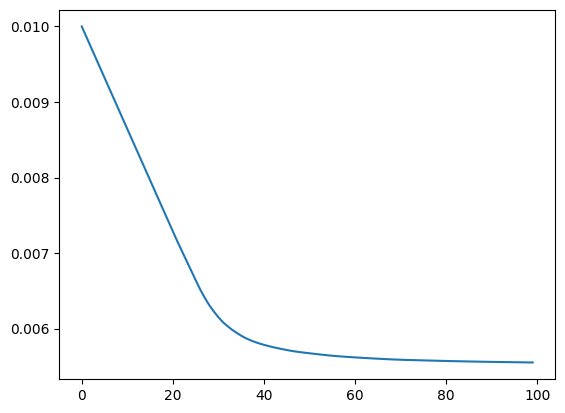

In [71]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [72]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

In [73]:
y_pred2=predict_svm(weights, X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred2))

Accuracy Score: 0.4918032786885246


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [74]:
# Add your code Here! 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63        31
           1       0.44      0.13      0.21        30

    accuracy                           0.49        61
   macro avg       0.47      0.49      0.42        61
weighted avg       0.47      0.49      0.42        61



In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        31
           1       0.67      0.60      0.63        30

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



c:\Users\vicfo\anaconda3\envs\cs329e\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [6]:
# Add your code Here! 